### Project Objectives
This project will attempt to answer the following questions from the data provided.
1. Which species appear in which park the most?
2. Is there a significant difference between species and their conservation status?
3. Are certain types of species more likely to be endangered? 

In [342]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns



In [343]:
#load the data
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')


In [344]:
print(species.columns)
print(observations.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


In [345]:
# check how many null values exist: 
# what are different data types in the data set?

print(observations.info(memory_usage= False))
print('\n')
print(species.info(memory_usage= False))

# 5824-191 = 5633: There are 5633 missing(null) rows in the conversation status.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)None


In [346]:
# Let's look at if missing data is systematic or if it's random before we try to deal with it.
print(species[species.conservation_status.notnull()])
print(species[species.conservation_status.isnull()])
species.conservation_status.value_counts(dropna=False)
#It appears that the missing rows are structurally missing data.

            category                   scientific_name  \
7             Mammal                     Canis latrans   
8             Mammal                       Canis lupus   
9             Mammal                       Canis rufus   
29            Mammal                  Eptesicus fuscus   
30            Mammal         Lasionycteris noctivagans   
...              ...                               ...   
5302  Vascular Plant             Callitriche marginata   
5399  Vascular Plant  Camissonia sierrae ssp. alticola   
5426  Vascular Plant                Epilobium oreganum   
5436  Vascular Plant              Botrychium ascendens   
5676  Vascular Plant                  Romneya coulteri   

                                           common_names conservation_status  
7                                                Coyote  Species of Concern  
8                                             Gray Wolf          Endangered  
9                                              Red Wolf          Enda

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [347]:
# It appears that scientific name is common between two csv files/datasets. Let's count how many unique scientific names are in species dataframe
# and see if it matches total count of rows. If it does, it probably indicates that the species_info file is a database of all distinct species names. 

print(species.scientific_name.value_counts(dropna=False))
print(species.scientific_name.count()) # This is the total count of scientific_names 
species[species.scientific_name=='Castor canadensis'] # This is an example of a duplicate
# explore duplicated values 
species['dup_scientific_name']= species.scientific_name.duplicated(False)
species[species.dup_scientific_name == True]
#This showed that scientific name is duplicated when multiple common names exist for the same species


Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64
5824


,category,scientific_name,common_names,conservation_status,dup_scientific_name
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,True
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN,True
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",NaN,True
...,...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN,True
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN,True
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN,True
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN,True


In [348]:
#Now let's look at the duplicates in the common_names column...

species['dup_common_name'] =species.common_names.duplicated(False)
print(species.common_names.value_counts(dropna=False)) 
# There are duplicates in the common_names as well. 
# Let's see the data to understand if they're typos.


Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Panic Grass                                                                   6
Bryum Moss                                                                    6
Sphagnum                                                                      6
                                                                             ..
Pine                                                                          1
Red Spruce                                                                    1
Norway Spruce                                                                 1
Fraser Fir                                                                    1
Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur    1
Name: common_names, Length: 5504, dtype: int64


In [349]:
duplicates_common_name = species[(species.dup_common_name == True) ]
duplicates_scientific_name = species[(species.dup_scientific_name == True) ]

In [350]:
# category, and conservation_status columns are categorical data so let's dig into them and see if there are any categorical names that has a typo
#  and if we can quickly clean that up. First let's count unique/distinct values
print(species.conservation_status.nunique()) # There are 4 distinct statuses
print(species.conservation_status.unique())

print('\n');print(species.category.nunique())# There are 7 distinct categories
print(species.category.unique())

#need to associate a ranking to differnet levels of conservation status
# per https://www.iucnredlist.org/ and ranking is as follows: 
# Not Evaluated, Data Deficient, Least Concern, Near Threatened, Vulnerable, Endangered, Critically Endangered, Extinct in the Wild and Extinct.
# Dataset shall have the following order: In Recovery< Species of Concern <Threatened < Endangered
#CategoricalDtype() # Another way to convert type to categorical, but prefer using pandas method Categorical in this project to prevent unnecessary library import
species['conservation_status'] = pd.Categorical(values= species.conservation_status, categories=['In Recovery', 'Species of Concern', 'Threatened', 'Endangered'], ordered = True)
species['category'] =pd.Categorical(values= species.category,categories=['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish' ,'Vascular Plant','Nonvascular Plant'])

print('\n'); print(species.dtypes)

# observation seems to be a numerical value, so let's convert that to an integer, since it's a count.
observations.observations.astype('int')
print('\n'); print(observations.dtypes)
observations.observations.value_counts() 


4
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category               category
scientific_name          object
common_names             object
conservation_status    category
dup_scientific_name        bool
dup_common_name            bool
dtype: object


scientific_name    object
park_name          object
observations        int64
dtype: object


84     220
85     210
91     206
92     203
95     202
      ... 
9        1
321      1
303      1
314      1
310      1
Name: observations, Length: 304, dtype: int64

In [351]:
#testing how to merge with duplicated scientific_names as that is the available common name between 2 datasets
test_species = pd.DataFrame({
    'scientific_name':['birdus','birdus','felix','felix','canis','canis','Panthera leo'],
    'common_name':['bird','birdie','cat','kitty','dog','puppy','lion']
})
test_observations = pd.DataFrame({
    'scientific_name': ['birdus','felix','canis','birdus','birdus','canis'],
    'national_park': ['Yosemite','Yellowstone','Rocky','Yellowstone','Rocky','Yosemite'],
    'observations': [3,2,5,6,7,10]
})
print(test_species);print('\n');print(test_observations)

  scientific_name common_name
0          birdus        bird
1          birdus      birdie
2           felix         cat
3           felix       kitty
4           canis         dog
5           canis       puppy
6    Panthera leo        lion


  scientific_name national_park  observations
0          birdus      Yosemite             3
1           felix   Yellowstone             2
2           canis         Rocky             5
3          birdus   Yellowstone             6
4          birdus         Rocky             7
5           canis      Yosemite            10


In [352]:
left= pd.merge(test_observations,test_species,how='left',on='scientific_name')
right= pd.merge(test_observations,test_species,how='right',on='scientific_name')
outer= pd.merge(test_observations,test_species,how='outer',on='scientific_name')
inner= pd.merge(test_observations,test_species,how='inner',on='scientific_name')
cross= pd.merge(test_observations,test_species,how='cross')
#based on this test, we should do a left merge on the actual dataset

In [353]:
print(observations.scientific_name.nunique())
# There are 5541 unique species in the observations dataset
print(species.scientific_name.nunique())
# There are 5541 unique species in the species dataset

# This means that it will likely be a 1:1 match once we merge two datasets together. 
# Left merge is used on the scientific_name column as that's the only shared column between the tables.
df=pd.merge(observations,species,how='left',on='scientific_name')
df.drop(columns=['dup_common_name','dup_scientific_name','common_names'],inplace=True)

5541
5541


In [354]:
#let's gather some quick stats
#df.head()
#df=df[df.scientific_name == 'Agrostis capillaris']
#df=df[df.park_name == 'Great Smoky Mountains National Park']
df.drop_duplicates(inplace=True)

df_grouped= df.groupby(['park_name','category','scientific_name']).sum()
df_grouped= df_grouped[df_grouped.observations != 0]
df_grouped
#df.head()

observations
park_name              category          scientific_name                                  
Bryce National Park    Mammal            Alces alces                                   101
                                         Alces alces shirasi                            81
                                         Antilocapra americana                          98
                                         Antrozous pallidus                             67
                                         Aplodontia rufa californica                    78
...                                                                                    ...
Yosemite National Park Nonvascular Plant Ulota hutchinsiae                             145
                                         Ulota hutchinsiae var. rufescens              166
                                         Weissia controversa                           141
                                         Zygodon viridissimus                          159
                                         Zygodon viridissimus var. rupestris           210

[22164 rows x 1 columns]

<AxesSubplot:xlabel='park_name', ylabel='observations'>

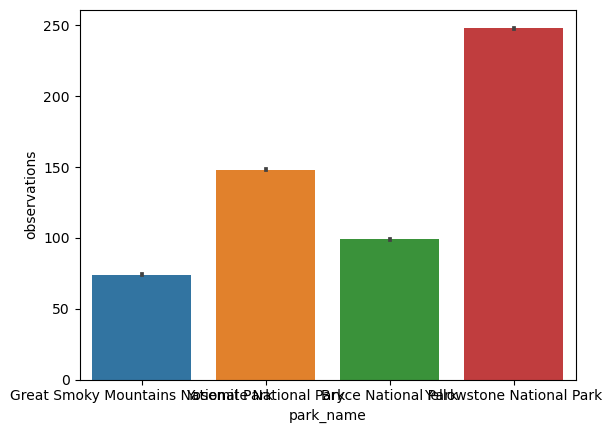

In [355]:
sns.barplot(x='park_name', y='observations',data=observations)

<AxesSubplot:xlabel='category', ylabel='observations'>

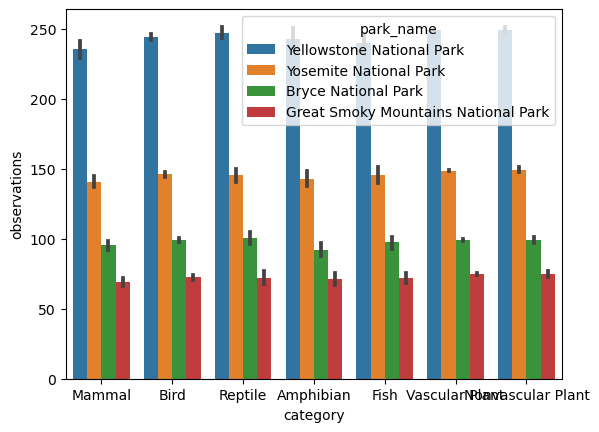

In [379]:

sns.barplot(x='category', y='observations',hue='park_name',data=df)


In [357]:
# How many different species in each park? There are more than 5820 species in each park.
df_size= df.groupby('park_name').size()
#df_size= df_size[df_size.observations != 0]
df_size
#sns.countplot(x='',y='',data=df_grouped,)

park_name
Bryce National Park                    5828
Great Smoky Mountains National Park    5823
Yellowstone National Park              5824
Yosemite National Park                 5826
dtype: int64

In [406]:
#How many species on average in each park?
df_group_1 = df.groupby('park_name').observations.aggregate(['min', 'max','mean','sum'])
df_group_1
#df[df.scientific_name=='Agrostis capillaris'] # This is a test filter

,min,max,mean,sum
park_name,,,,
Bryce National Park,9,176,98.866678,576195
Great Smoky Mountains National Park,10,147,74.109050,431537
Yellowstone National Park,57,321,247.770604,1443016
Yosemite National Park,31,223,148.164950,863209


In [376]:
#What is the top 5 most observed species?
df_sorted=df.sort_values('observations',ascending=False,ignore_index=True)
df_sorted=df_sorted.iloc[:10]

df_group_2= df.groupby(['scientific_name']).observations.aggregate(['sum'])
df_group_2.sort_values('sum',ascending=False,inplace=True)
df_group_2.iloc[:10]

,sum
scientific_name,
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
Procyon lotor,1692
Columba livia,1653
Oncorhynchus mykiss,1626
Myotis lucifugus,1547
Streptopelia decaocto,1530
